# End-to-End Machine Learning project on predicting housing prices

## To do an end-to-end Machine Learning project we need to do the following steps¶


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [26]:
housing = pd.read_csv('./housing/housing.csv')

In [27]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
'''This data has metrics such as the population, median income, median housing price, and so on for each block group in California.
A blockgroup typically has a population of 600 to 3,000 people
We will just call them “districts” for short'''

'This data has metrics such as the population, median income, median housing price, and so on for each block group in California.\nA blockgroup typically has a population of 600 to 3,000 people\nWe will just call them “districts” for short'

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Visualization

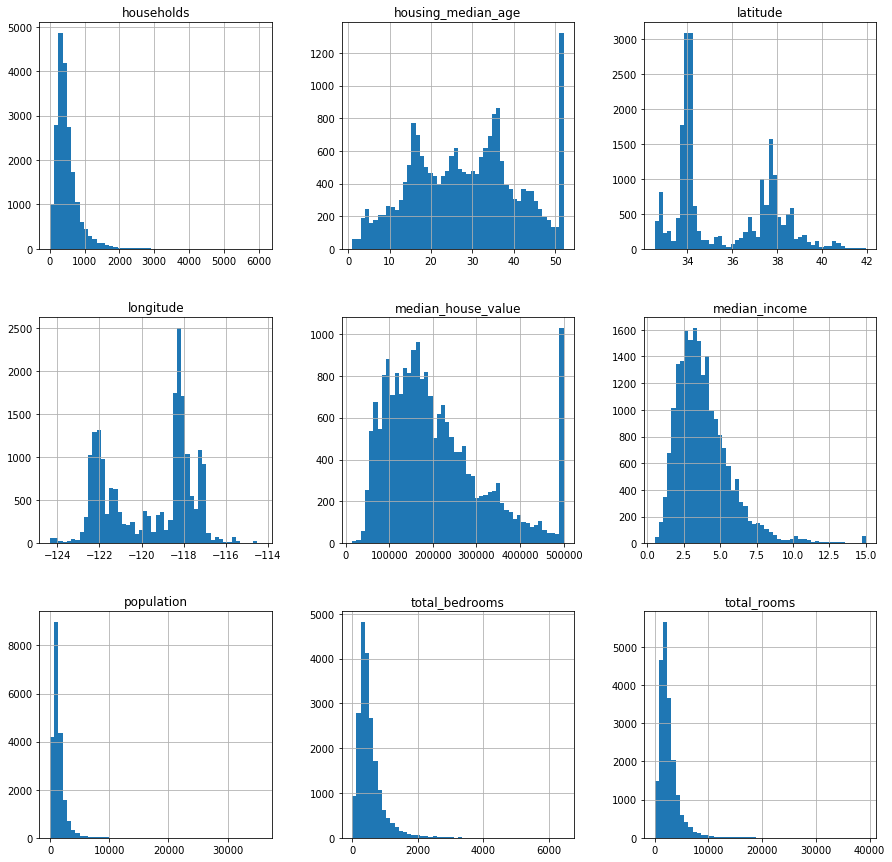

In [38]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

## Pre - Process the data

In [39]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [42]:
strat_train_set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.drop(["income_cat"], axis=1, inplace=True)

In [43]:
housing = strat_train_set.copy()

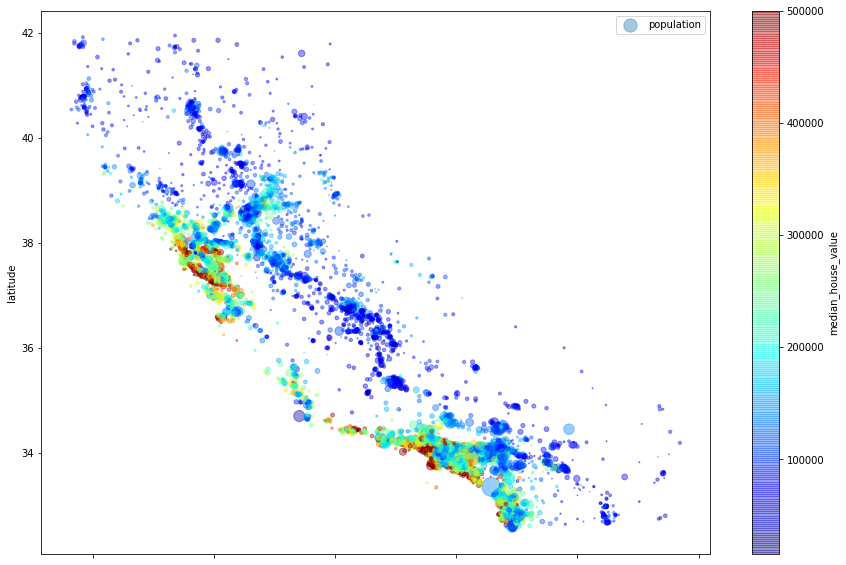

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,10))
plt.legend()

In [46]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019ADD9EB408>,
      dtype=object)

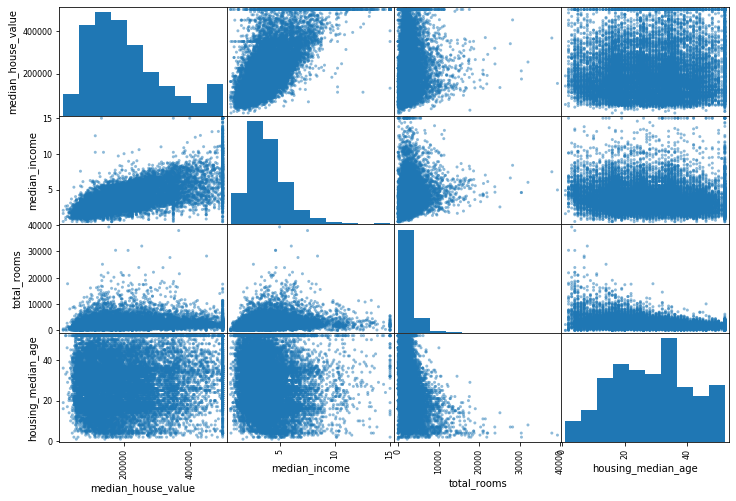

In [47]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

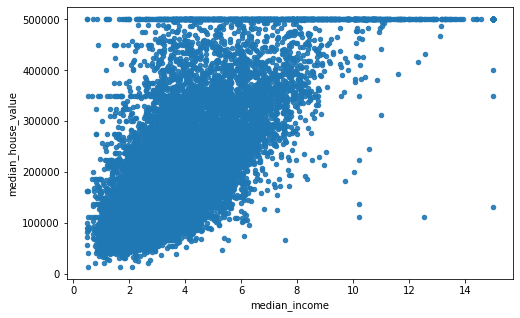

In [51]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.9, figsize=(8,5))

In [52]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN


In [53]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [54]:
housing.head(3)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


In [56]:
corr_matrix = housing.corr()

In [57]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Data Cleaning

In [58]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [60]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [61]:
# imputer.fit(housing_num)

In [62]:
# imputer.statistics_

In [63]:
# housing_num.median()

In [64]:
# X = imputer.transform(housing_num)

In [65]:
# housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

In [67]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [68]:
# this component gives us the flexibility to add extra attributes to our pipeline

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,

                         
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [69]:
# this component allows us to select entire or partial dataframe
# or in simpler words we can tell which attributes we want in our pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [70]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [71]:
# housing_num = housing.drop('ocean_proximity', axis=1)

In [72]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [73]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

In [75]:
# our numerical pipeline

num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy="median")),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
                ])

In [76]:
# our categorical pipeline

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [77]:
# our full pipeline

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [78]:
housing_prepared = full_pipeline.fit_transform(housing)


In [79]:
housing_prepared


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Linear Regression with K-fold cross validation¶


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [81]:
lin_reg = LinearRegression()

In [82]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [83]:
# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

In [84]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  69052.46136345083 
Standard Deviation: 2731.6740017983493


## Decision Tree Regressor with K-fold cross validation¶


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [86]:
tree_reg = DecisionTreeRegressor()

In [87]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [88]:
# see the 10 scores
scores

array([-4.75301158e+09, -4.39697027e+09, -4.94305678e+09, -4.76652135e+09,
       -5.18489963e+09, -5.46696255e+09, -4.79441146e+09, -5.04683963e+09,
       -5.86838773e+09, -5.10277407e+09])

In [89]:
# find root mean squared error
rmse_scores = np.sqrt(-scores)

In [90]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  70886.56828034858 
Standard Deviation: 2734.5826103410855


## Ensemble Learning - Random Forest Regressor¶


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_reg = RandomForestRegressor()

In [94]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

In [97]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [99]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  50221.06026694305 
Standard Deviation: 1954.854322845841


## Fine tune our model with Hyper parameters¶


In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [102]:
forest_reg = RandomForestRegressor()

In [103]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

In [108]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [105]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
cvres = grid_search.cv_results_

In [107]:
print("{}\t\t {}\n".format('Mean Score','Parameters'))

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

63725.53	 {'max_features': 2, 'n_estimators': 3}
55527.88	 {'max_features': 2, 'n_estimators': 10}
52726.43	 {'max_features': 2, 'n_estimators': 30}
60837.28	 {'max_features': 4, 'n_estimators': 3}
52897.14	 {'max_features': 4, 'n_estimators': 10}
50819.70	 {'max_features': 4, 'n_estimators': 30}
58443.61	 {'max_features': 6, 'n_estimators': 3}
51936.25	 {'max_features': 6, 'n_estimators': 10}
49990.89	 {'max_features': 6, 'n_estimators': 30}
58057.90	 {'max_features': 8, 'n_estimators': 3}
52185.16	 {'max_features': 8, 'n_estimators': 10}
49711.68	 {'max_features': 8, 'n_estimators': 30}
61687.55	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54646.34	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59503.95	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52717.60	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59298.41	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51588.38	 {'bootstrap': False, '

## Evaluate your model on the test set


In [110]:
final_model = grid_search.best_estimator_

In [116]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [117]:
y_test = strat_test_set["median_house_value"].copy()

In [118]:
# we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

In [119]:
# do the prediction
final_predictions = final_model.predict(X_test_prepared)

In [120]:
# find mean square error
final_mse = mean_squared_error(y_test, final_predictions)

In [121]:
# find root mean square error
final_rmse = np.sqrt(final_mse)

In [122]:
final_rmse

47703.401339589145